In [52]:
import numpy as np 
import pandas as pd 
from time import time 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import warnings 


In [53]:
cases= pd.read_csv('/content/estimated_numbers.csv')
cases.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [54]:
incidence = pd.read_csv('/content/incidence_per_1000_pop_at_risk.csv')
incidence.head()

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe


In [55]:
reports = pd.read_csv('/content/reported_numbers.csv')
reports.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


In [56]:
cases.shape

(856, 11)

In [57]:
incidence.shape


(2033, 4)

In [58]:
reports.shape

(1944, 5)

In [59]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               856 non-null    object 
 1   Year                  856 non-null    int64  
 2   No. of cases          856 non-null    object 
 3   No. of deaths         856 non-null    object 
 4   No. of cases_median   856 non-null    int64  
 5   No. of cases_min      544 non-null    float64
 6   No. of cases_max      544 non-null    float64
 7   No. of deaths_median  856 non-null    int64  
 8   No. of deaths_min     524 non-null    float64
 9   No. of deaths_max     524 non-null    float64
 10  WHO Region            856 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 73.7+ KB


In [60]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


In [62]:
df1 = reports.sort_values(by = 'No. of cases', ascending=False)
df1 = df1[df1['Year']==2017][:50]

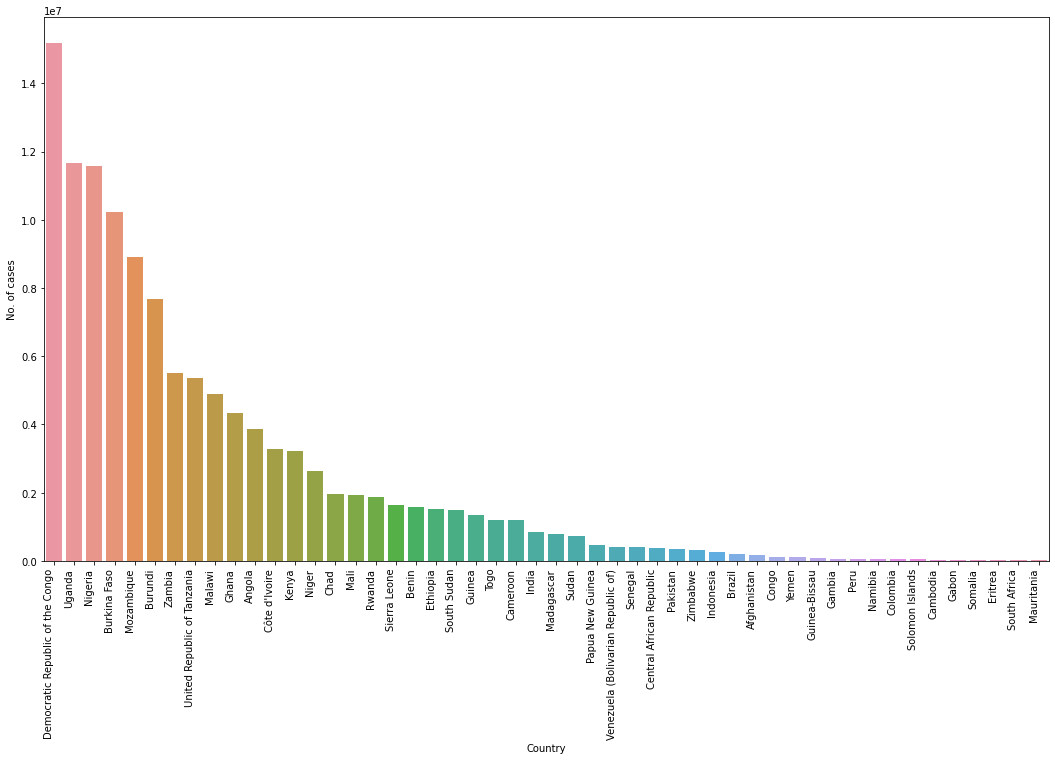

In [63]:
#Top 50 countries with largest number of cases in 2017
plt.figure(figsize=(18,10))
sns.barplot(df1['Country'], df1['No. of cases'])
plt.xticks(rotation=90, ha='right');

In [64]:
df2 = reports.sort_values(by = 'No. of cases', ascending=False)
df2 = df2[df2['Year']==2016][:50]

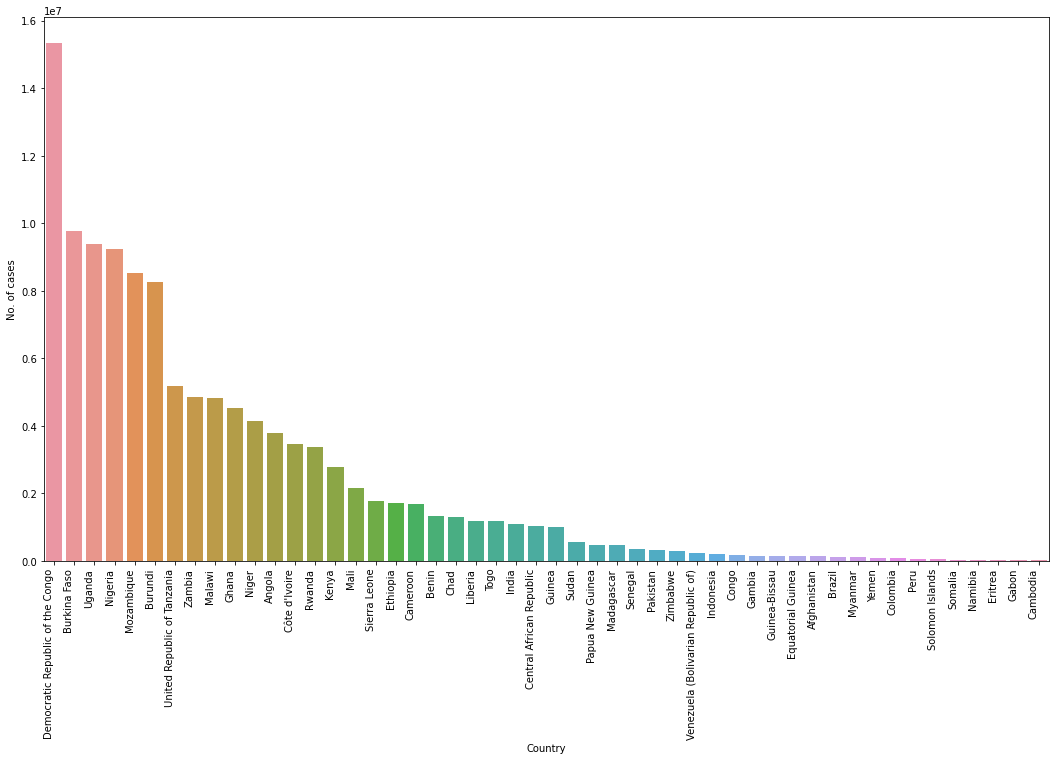

In [65]:
#Top 50 countries with largest number of cases in 2016
plt.figure(figsize=(18,10))
sns.barplot(df2['Country'], df2['No. of cases'])
plt.xticks(rotation=90, ha='right');

In [66]:
#Top 50 countries with largest number of deaths in 2017
df3 = df1[df1['Year']==2017][:50]
df3 = df3.sort_values(by = 'No. of deaths', ascending=False)

In [67]:
df3.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
27,Democratic Republic of the Congo,2017,15176927.0,27458.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
98,Uganda,2017,11667831.0,5111.0,Africa
14,Burundi,2017,7670177.0,4414.0,Africa
13,Burkina Faso,2017,10225459.0,4144.0,Africa


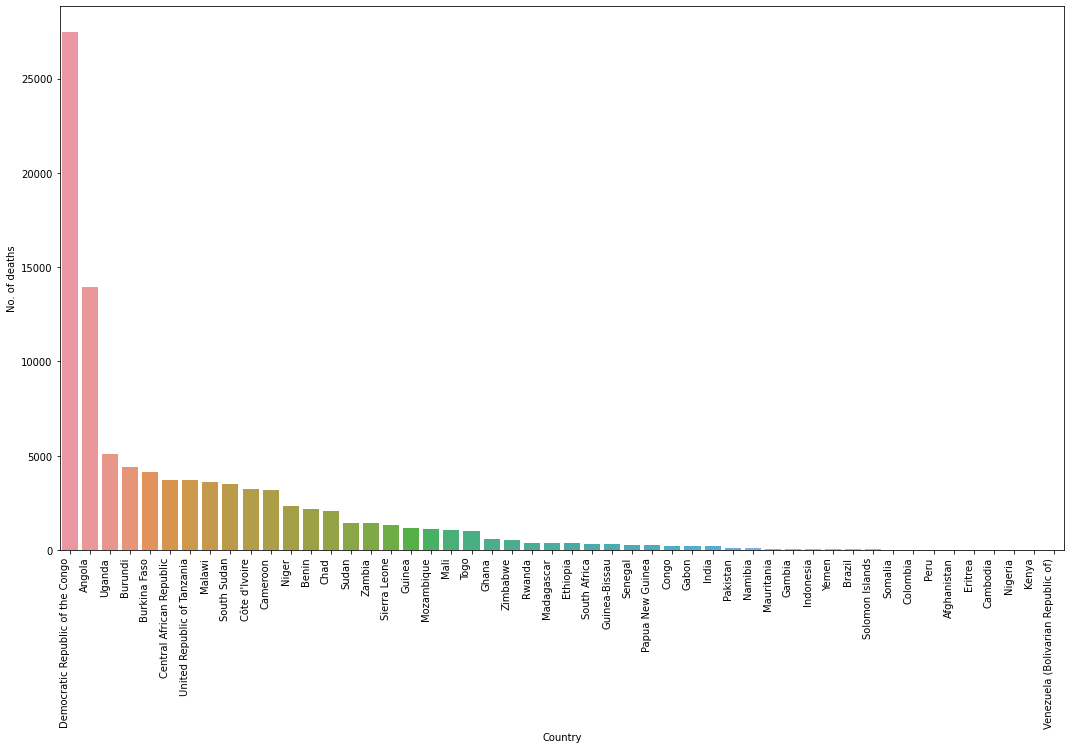

In [68]:
#Top 50 countries with largest number of deaths in 2017
plt.figure(figsize=(18,10))
sns.barplot(df3['Country'], df3['No. of deaths'])
plt.xticks(rotation=90, ha='right');

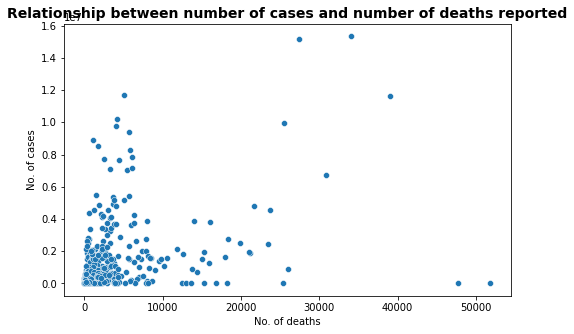

In [69]:
#Relationship between number of cases and number of deaths reported
plt.figure(figsize =(8,5))
plt.title('Relationship between number of cases and number of deaths reported', fontsize=14, fontweight='bold')
ax =sns.scatterplot(x= 'No. of deaths', y ='No. of cases',data = reports)

In [70]:
df4 =reports.groupby('Year').sum().loc[:, ['No. of cases', 'No. of deaths']]

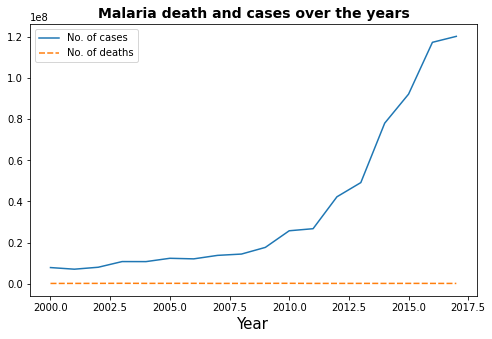

In [71]:
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df4)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases over the years', fontsize=14, fontweight='bold')
plt.show()

In [73]:
#Total cases reported which was region wise
df5 =reports.groupby('WHO Region').sum().loc[:, ['No. of cases', 'No. of deaths']]

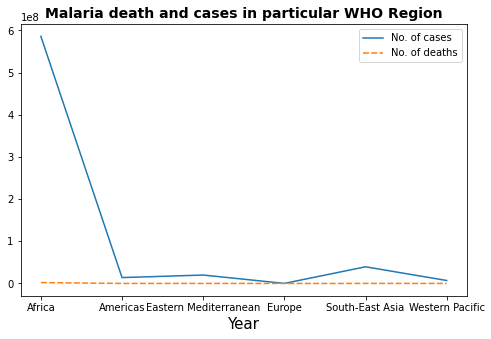

In [74]:
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df5)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases in particular WHO Region', fontsize=14, fontweight='bold')
plt.show()

In [75]:
df4.head()

,No. of cases,No. of deaths
Year,,
2000,7816830.0,88220.0
2001,7026451.0,112612.0
2002,7971965.0,119336.0
2003,10732686.0,161577.0
2004,10714285.0,122020.0


In [76]:
incidence.head()

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe


In [78]:
df6 =reports.groupby('Year').sum().loc[:, ['No. of cases']]

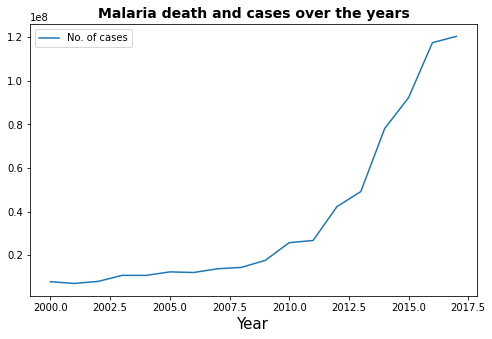

In [79]:
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df6)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases over the years', fontsize=14, fontweight='bold')
plt.show()